# **Topic and Keyword Extraction from MeetingBank Using TopicBert**

In [ ]:
!pip install bertopic==0.16.0 datasets==2.16.1

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing ins

In [ ]:
!pip install plotly

In [ ]:
from datasets import load_dataset
import pandas as pd
import re
import random
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


def clean_text(text: str):
    if not isinstance(text, str):
        # raise TypeError("text must be a string")
        return ""

    #text = re.sub('[^a-zA-Z]',' ',str(text)).lower()

    # remove urls
    text = re.sub(r"http\S+", " link", text)

    # replace any digit with number
    text = re.sub(r"\d+", " number ", text)

    # set space before and after any punctuation
    text = re.sub(r"([^\w\s])", r" \1 ", text)

    # remove extra spaces
    text = re.sub(r"\s+", " ", text)

    #stemmer = PorterStemmer()
    stopwords = set(nltk.corpus.stopwords.words('english'))

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stopwords]
    text = " ".join(filtered_words)

    return text.lower().strip()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from datasets import load_dataset

meeting_bank = load_dataset("lytang/MeetingBank-transcript")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
raw_dataset = [
    {
        "meeting_id": rec["meeting_id"],
        "source": rec["source"],
        "type": rec["type"],
        "reference": rec["reference"],
        "city": rec["city"]
    }
    for rec in meeting_bank['train']
]

In [ ]:
meeting_bank_df = pd.DataFrame( raw_dataset )
meeting_bank_df = meeting_bank_df.sample(frac=1, random_state=101)

In [ ]:
meeting_bank_df

,meeting_id,source,type,reference,city
4156,DenverCityCouncil_04182016_16-0291,"Speaker 2: Councilwoman Gilmore, will you plea...",Bill,A bill for an ordinance concerning the licensi...,DenverCityCouncil
971,LongBeachCC_07102018_18-0579,Speaker 3: Three want to. Stay there. One more...,Agenda Item,Recommendation to request City Manager to work...,LongBeachCC
2856,SeattleCityCouncil_04262022_CB 120303,"Speaker 0: Thank you, Madam Clerk. The bill pa...",Ordinance (Ord),AN ORDINANCE relating to grant funds from the ...,SeattleCityCouncil
1656,LongBeachCC_07212015_15-0675,Speaker 0: Okay. Thank you. So I just a big me...,Resolution,Recommendation to receive supporting documenta...,LongBeachCC
3447,DenverCityCouncil_11302020_20-1124,Speaker 0: 13 Eyes Council Bill 20 Dash. 1123 ...,Bill,A bill for an ordinance changing the zoning cl...,DenverCityCouncil
...,...,...,...,...,...
4171,DenverCityCouncil_02012016_15-0912,Speaker 7: Thank you very much. Council Presid...,Bill,Amends various sections of the Denver Revised ...,DenverCityCouncil
599,LongBeachCC_05052020_20-0391,Speaker 0: Thank you. You please do. I am 25. ...,Ordinance,Recommendation to declare ordinance amending ...,LongBeachCC
1361,LongBeachCC_08232016_16-0796,"Speaker 0: Thank you. Next up is Kathy Lynn, p...",Agenda Item,Recommendation to review draft ordinance amend...,LongBeachCC
1547,LongBeachCC_12082015_15-1265,Speaker 10: Do you want to go back to item 14?...,Contract,Recommendation to adopt Specifications No. ITB...,LongBeachCC


In [ ]:
meeting_bank_df['source'] = meeting_bank_df['source'].apply(clean_text)

In [ ]:
meeting_bank_df['text_len'] = meeting_bank_df['source'].apply(len)

In [ ]:
meeting_bank_df.head(2)

,meeting_id,source,type,reference,city,text_len
4156,DenverCityCouncil_04182016_16-0291,"speaker number : councilwoman gilmore , please...",Bill,A bill for an ordinance concerning the licensi...,DenverCityCouncil,26844
971,LongBeachCC_07102018_18-0579,speaker number : three want . stay . one . got...,Agenda Item,Recommendation to request City Manager to work...,LongBeachCC,13322


<Axes: xlabel='text_len', ylabel='Count'>

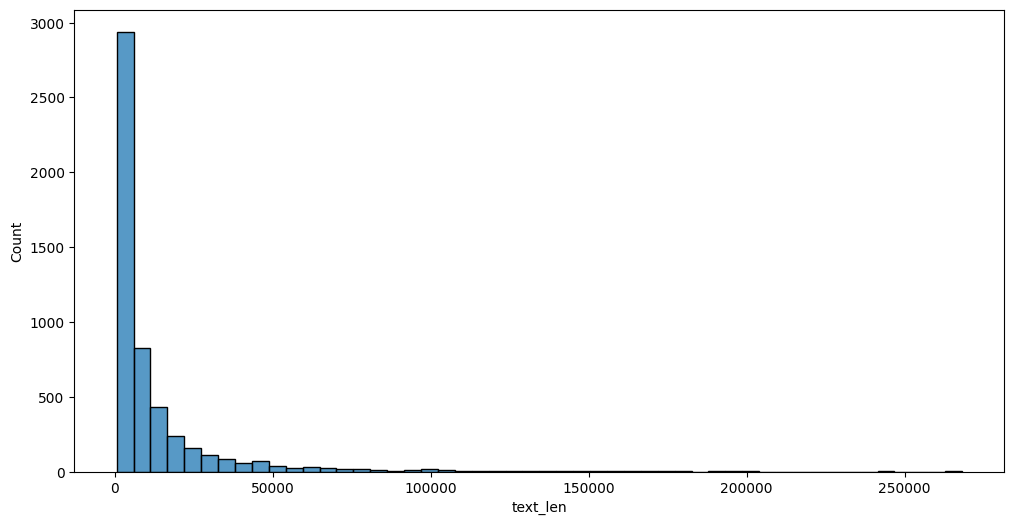

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(meeting_bank_df['text_len'], bins=50)

In [ ]:
print(meeting_bank_df.shape)
meeting_bank_df = meeting_bank_df[ meeting_bank_df['text_len'] <= 100_000 ]
print(meeting_bank_df.shape)

(5169, 6)
(5103, 6)


# **Embedding**

In [ ]:
from sentence_transformers import SentenceTransformer

# model_id = "sentence-transformers/distiluse-base-multilingual-cased-v2"
model_id = "sentence-transformers/LaBSE"
embedding_model = SentenceTransformer(model_id)

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

In [ ]:
news_embeddings = embedding_model.encode(meeting_bank_df['source'].values, show_progress_bar=True)

Batches:   0%|          | 0/160 [00:00<?, ?it/s]

# **Dim Reduction**

In [ ]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=15,
                  min_dist=0.0, metric='cosine',
                  random_state=101)

# **Clustering**

In [ ]:
from hdbscan import HDBSCAN

# A higher min_cluster_size will generate fewer topics
# A lower min_cluster_size will generate more topics.

hdbscan_model = HDBSCAN(min_cluster_size=30,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# **Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(min_df=0.3,
                                   analyzer='word',
                                   max_df=0.8,
                                   ngram_range=(1, 3)
                                   )

# **Topic Representer**

In [ ]:
from bertopic.representation import KeyBERTInspired

keybert_model = KeyBERTInspired()

representation_model = {
    "KeyBERT": keybert_model
}

# **Analyse**

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(
    # Pipeline models
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,

    # Hyperparameters
    top_n_words=10,
    verbose=True
)

topics, probs =  topic_model.fit_transform(
    meeting_bank_df['source'].values,
    news_embeddings
)

2024-09-18 15:00:49,815 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-09-18 15:01:29,856 - BERTopic - Dimensionality - Completed ✓
2024-09-18 15:01:29,858 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-09-18 15:01:30,375 - BERTopic - Cluster - Completed ✓
2024-09-18 15:01:30,382 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-09-18 15:02:29,318 - BERTopic - Representation - Completed ✓


In [ ]:
print(
    meeting_bank_df['source'].values[50],
    topics[50], probs[50]
)

topic_model.get_topic(2)

speaker number : item number . oh . . brothers ? please read agenda item number number . speaker number : adoption resolutions item number resolution number number . denouncing enormous backlog citizen applications u . . citizenship immigration services . ' currently preventing number , number immigrants seattle becoming u . . citizens voters affirming city ' recognition immigrants new americans integral part states . communities support integrate seattle nation , uphold rights opportunity receive fair equitable treatment journey obtain legal status , including citizenship u . . constitution , statutes regulations . speaker number : apologize . councilman gonzales , floor . speaker number : ' okay . ' busy day ' number : number p . . , understand . try keep remarks brief . ' really excited advancing resolution . many immigrant rights advocates service providers identified disturbing trend since january number resulted significant backlog applications naturalization uscis . specifically

[('airport', 0.009397001328202266),
 ('alameda', 0.008875777811310588),
 ('hotel', 0.0071819993956311196),
 ('cashman', 0.006665420296531614),
 ('final consideration', 0.006546762549659792),
 ('thank madam president', 0.006075497469926851),
 ('councilman flynn', 0.0058068925214892105),
 ('cdebaca', 0.005724573019328832),
 ('planning board', 0.005477998339787332),
 ('hines', 0.005381194579556262)]

In [ ]:
meeting_bank_df['topic'] = topics
meeting_bank_df['prob'] = probs

In [ ]:
meeting_bank_df[meeting_bank_df['topic'] == 0 ].head()

,meeting_id,source,type,reference,city,text_len,topic,prob
4108,DenverCityCouncil_08292016_16-0766,speaker number : right . ' going move second p...,Proclamation,A proclamation recognizing and celebrating Den...,DenverCityCouncil,9252,0,1.000000
1045,LongBeachCC_02202018_18-0171,speaker number : thank . last request tonight ...,Agenda Item,Recommendation to receive and file a report fr...,LongBeachCC,2745,0,1.000000
1141,LongBeachCC_09192017_17-0825,speaker number : okay . thank . ' go ahead one...,Agenda Item,Recommendation to: 1) Direct City Attorney to ...,LongBeachCC,51489,0,0.901588
1205,LongBeachCC_06062017_17-0445,speaker number : motion passes . speaker numbe...,Agenda Item,Recommendation to receive and file a report fr...,LongBeachCC,10149,0,0.927046
1510,LongBeachCC_02092016_16-0146,speaker number : next item . speaker number : ...,Resolution,Recommendation to adopt resolution in support ...,LongBeachCC,2431,0,0.961574


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,2347,-1_long beach_alameda_richardson_king county,"[long beach, alameda, richardson, king county,...","[number thank mayor, number item number, speak...",[speaker number : unanimous . thank much . con...
1,0,397,0_long beach_richardson_city long beach_violence,"[long beach, richardson, city long beach, viol...","[number item number, thank mr mayor, thank vic...",[speaker number : okay . thank . moving budget...
2,1,321,1_passage bill_number agenda item_unopposed_ch...,"[passage bill, number agenda item, unopposed, ...","[bill number number, number council bill, item...",[speaker number : agenda item number constable...
3,2,320,2_airport_alameda_hotel_cashman,"[airport, alameda, hotel, cashman, final consi...","[council resolution number, number number eyes...","[speaker number : . madam secretary , please c..."
4,3,311,3_rezoning_blueprint_blueprint denver_zone dis...,"[rezoning, blueprint, blueprint denver, zone d...","[bill number number, storey, dwelling, number ...",[speaker number : okay . need second member co...
5,4,205,4_carries speaker_carries speaker number_motio...,"[carries speaker, carries speaker number, moti...","[citywide speaker number, number district six,...","[speaker number : thank much . moving , think ..."
6,5,183,5_final consideration_cashman_secretary please...,"[final consideration, cashman, secretary pleas...","[dash number number, bill number number, numbe...",[speaker number : number eyes . final consider...
7,6,134,6_general fund_alameda_pension_fy number,"[general fund, alameda, pension, fy number, fy...","[number number year, fiscal year number, numbe...","[speaker number : okay , excellent . transitio..."
8,7,121,7_docket_docket number_city boston_chair recog...,"[docket, docket number, city boston, chair rec...","[number docket number, amount number number, d...",[speaker number : docket number message order ...
9,8,114,8_long beach_coastal_marijuana_cannabis,"[long beach, coastal, marijuana, cannabis, coa...","[thank mr mayor, mr mayor, thank next speaker,...",[speaker number : thank . hearing item one . s...


In [ ]:
topics = topic_model.get_topics()
print(len(topics)) # This should show the list of topics


21


In [ ]:
# Visualize topics
fig = topic_model.visualize_topics()
fig.show()


1. Axes (D1, D2): Represent dimensions from dimensionality reduction (like UMAP);
proximity indicates similarity.
2. Circles: Each circle represents a topic, with size reflecting prominence; transparency
shows overlapping topics.
3. Interpretation: The positioning of the circles helps in understanding how the topics cluster together.
For example:


    *   If some topics (like Topic 0 and Topic 6) are located near each other, it suggests that they share similar themes or content.
    *   Conversely, topics that are farther apart (like Topic 12 and Topic 18) likely  cover very different subject matters.


  

In [ ]:
# Visualize topics
fig = topic_model.visualize_distribution(probs)
fig.show()

The probability values quantify how likely each topic is to appear in the dataset. For
instance:
*  High Probability Topics: Topics like "Topic 19: metropolitan-stadium-mi..." and "Topic 16: king county-mr chair-el..." likely play significant roles in the discussions, indicating they were prominent themes.
* Lower Probability Topics: Conversely, topics with lower probabilities (e.g., "Topic 0: long beach-richardson-ci...") indicate less frequent discussions, suggesting these topics were less central to the overall conversation.

The Topic Probability Distribution visually conveys the prominence of various themes in the bank meeting dataset, facilitating insights into the topics discussed and their relevance.

In [ ]:
topic_model.visualize_heatmap()

1. **Clusters of similarity**: You can observe darker blue regions where items are more similar to each other. For instance, documents/items 0, 3, 4, and 5 show a higher degree of similarity with one another (darker shades of blue in that section).

2.  **Variability**: Other parts of the matrix are lighter in color, indicating lower similarity
between those pairs of documents. This suggests some documents/items are quite
different from others.
3. **Off-diagonal elements**: These values represent the similarity between different
pairs of documents. The closer the value is to 1, the more similar the two items are.

In [ ]:
topics_per_class = topic_model.topics_per_class(
    meeting_bank_df['source'].values,
    classes=meeting_bank_df['meeting_id'].values,
)

5103it [05:32, 15.37it/s]


In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(
    meeting_bank_df['source'].values
)

100%|██████████| 19/19 [00:00<00:00, 109.01it/s]


In [ ]:
topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

AttributeError: Module 'scipy' has no attribute 'array'

# **Topic Merging**

In [ ]:
topics_to_merge = [
    [15, 60, 4],
    [30, 23, 7]
]

topic_model.merge_topics(
    meeting_bank_df['source'].values,
    topics_to_merge
)

IndexError: index 61 is out of bounds for axis 0 with size 21

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(
    meeting_bank_df['source'].values,
)

topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

# **Topic Filtering**

In [ ]:
filtered_meeting_bank_df= meeting_bank_df[ ~meeting_bank_df['topic'].isin([-1]) ]
filtered_meeting_bank_df.head()

NameError: name 'meeting_bank_df' is not defined

# **Inference**

In [ ]:
meeting_bank['test'][0]

{'meeting_id': 'LongBeachCC_08092022_22-0921',
 'source': "Speaker 4: But why don't I just go through these? I we just go to these quickly. Item number ten, please.\nSpeaker 0: Item ten is communication from Council in price of recommendation to request City Manager to work with the Health and Human Services Department to provide a comprehensive presentation on the monkeypox virus.\nSpeaker 4: Someone Price.\nSpeaker 2: Thank you, Mr. Mayor. I think the items self-explanatory and I think staff is going to be prepared to come back because only face wash costs.\nSpeaker 4: Someone has their mike on for I.\nSpeaker 2: Can you hear me, Mr. Mayor? Yes.\nSpeaker 4: You're clear.\nSpeaker 2: Okay. I think the item is self-explanatory, and I look forward to staff's presentation on the monkeypox virus, because I think we're getting all getting a lot of questions about it and how it transmits and how to make sure that our residents are being protected. So I look forward to hearing the presentati

In [ ]:
example = [rec['source'] for rec in meeting_bank['test']]

In [ ]:
example

In [ ]:
_topic, _prob =  topic_model.transform([example])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-09-18 15:44:50,393 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-09-18 15:44:53,403 - BERTopic - Dimensionality - Completed ✓
2024-09-18 15:44:53,404 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-09-18 15:44:53,409 - BERTopic - Cluster - Completed ✓


In [ ]:
_topic, _prob

([1], array([0.37624768]))

In [ ]:
topic_model.get_topic(_topic[0])

[('king county', 0.011719583457560617),
 ('long beach', 0.010968420917025644),
 ('carries speaker number', 0.008668448521903079),
 ('carries speaker', 0.008668448521903079),
 ('golf', 0.008649352804366872),
 ('elections', 0.008406394472828255),
 ('bargaining', 0.008318571494945809),
 ('golf course', 0.008149770668230607),
 ('motion carries speaker', 0.007718128010991446),
 ('proposed ordinance', 0.007413536149005271)]

# **Save and Reload**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
import os
os.chdir("/gdrive/My Drive/meeting_resume")

In [ ]:
model_id = "sentence-transformers/LaBSE"
topic_model.save("safe_bertopic", serialization="safetensors",
                 save_ctfidf=True, save_embedding_model=model_id)

loaded_model = BERTopic.load("safe_bertopic_transcriptions")

In [ ]:
topic_model.save("bert_topic_transcription_meeting.pkl", serialization="pickle")

loaded_model = BERTopic.load("bert_topic_transcription_meeting.pkl")